# Correlated data 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

In [3]:
data = pd.read_csv("correlated_data.csv", low_memory = False)
data.shape

(52490, 12)

In [4]:
#data.columns
data.mean()

BS:PI-0018-050-B__PV_RW     99.045845
BS:PI-0018-060-B__PV_RW    142.326345
BS:PI-0021-060-B__PV_RW    148.503885
BS:PI-0021-031-A__PV_RW    148.201168
BS:PI-0018-031-A__PV_RW    141.726311
BS:PI-0019-031-A__PV_RW    115.753359
BS:PI-0019-032-B__PV_RW    254.122152
BS:PI-0020-031-A__PV_RW    135.086180
BS:PI-0022-060-B__PV_RW    157.214396
BS:PI-0019-032-A__PV_RW    254.225560
BS:PI-0017-060-B__PV_RW    147.256297
dtype: float64

In [5]:
col = data['BS:PI-0018-050-B__PV_RW']
col.min(), col.max()

(0.0, 198.7010345)

# Line chart

In [41]:
data['datetime'] = pd.to_datetime(data['date'])
data = data.set_index('datetime')
data = data.drop('date', axis = 1)
data = data.sort_index()

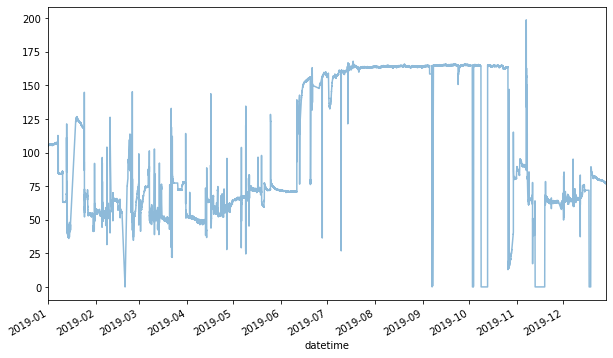

In [42]:
axes = data['BS:PI-0018-050-B__PV_RW'].plot(alpha = 0.5, figsize = (10, 6))

# Box plots

In [8]:
data['Year'] = data.index.year
data['Month'] = data.index.month
#data1['Weekday Name'] = data1.index.weekday_name

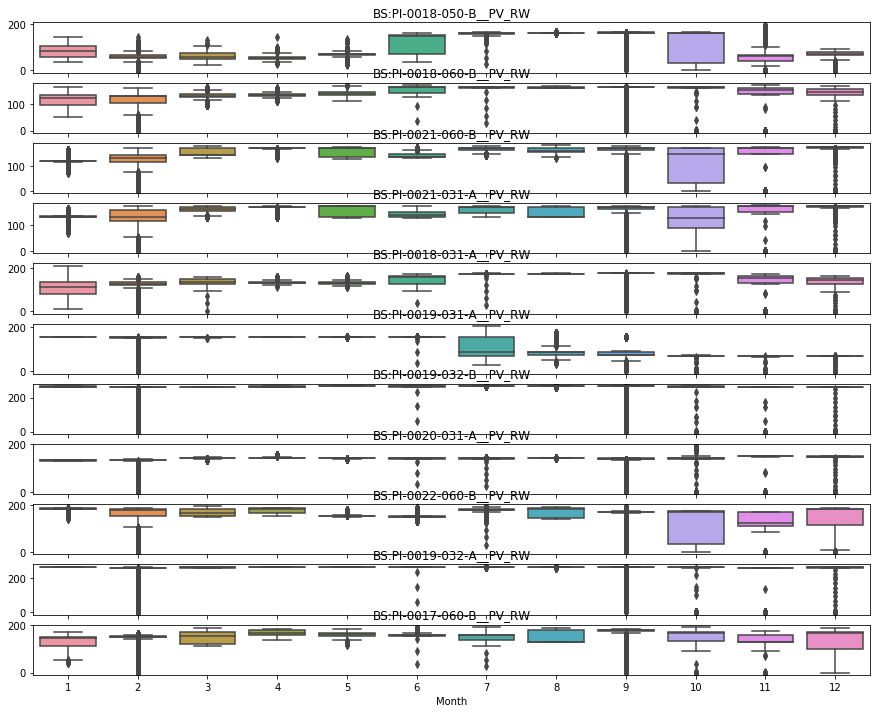

In [9]:
fig, axes = plt.subplots(11, 1, figsize = (15, 12), sharex = True)
for name, ax in zip(data.columns, axes):
    sns.boxplot(data = data, x = 'Month', y = name, ax = ax)
    ax.set_ylabel('')
    ax.set_title(name)
    ax.set_xlabel('')
    if ax == axes[-1]:
        ax.set_xlabel('Month')

# Data distribution

In [4]:
data = pd.read_csv("correlated_data.csv", low_memory = False)
to_drop = ['date']
data.drop(to_drop, axis = 1, inplace = True)

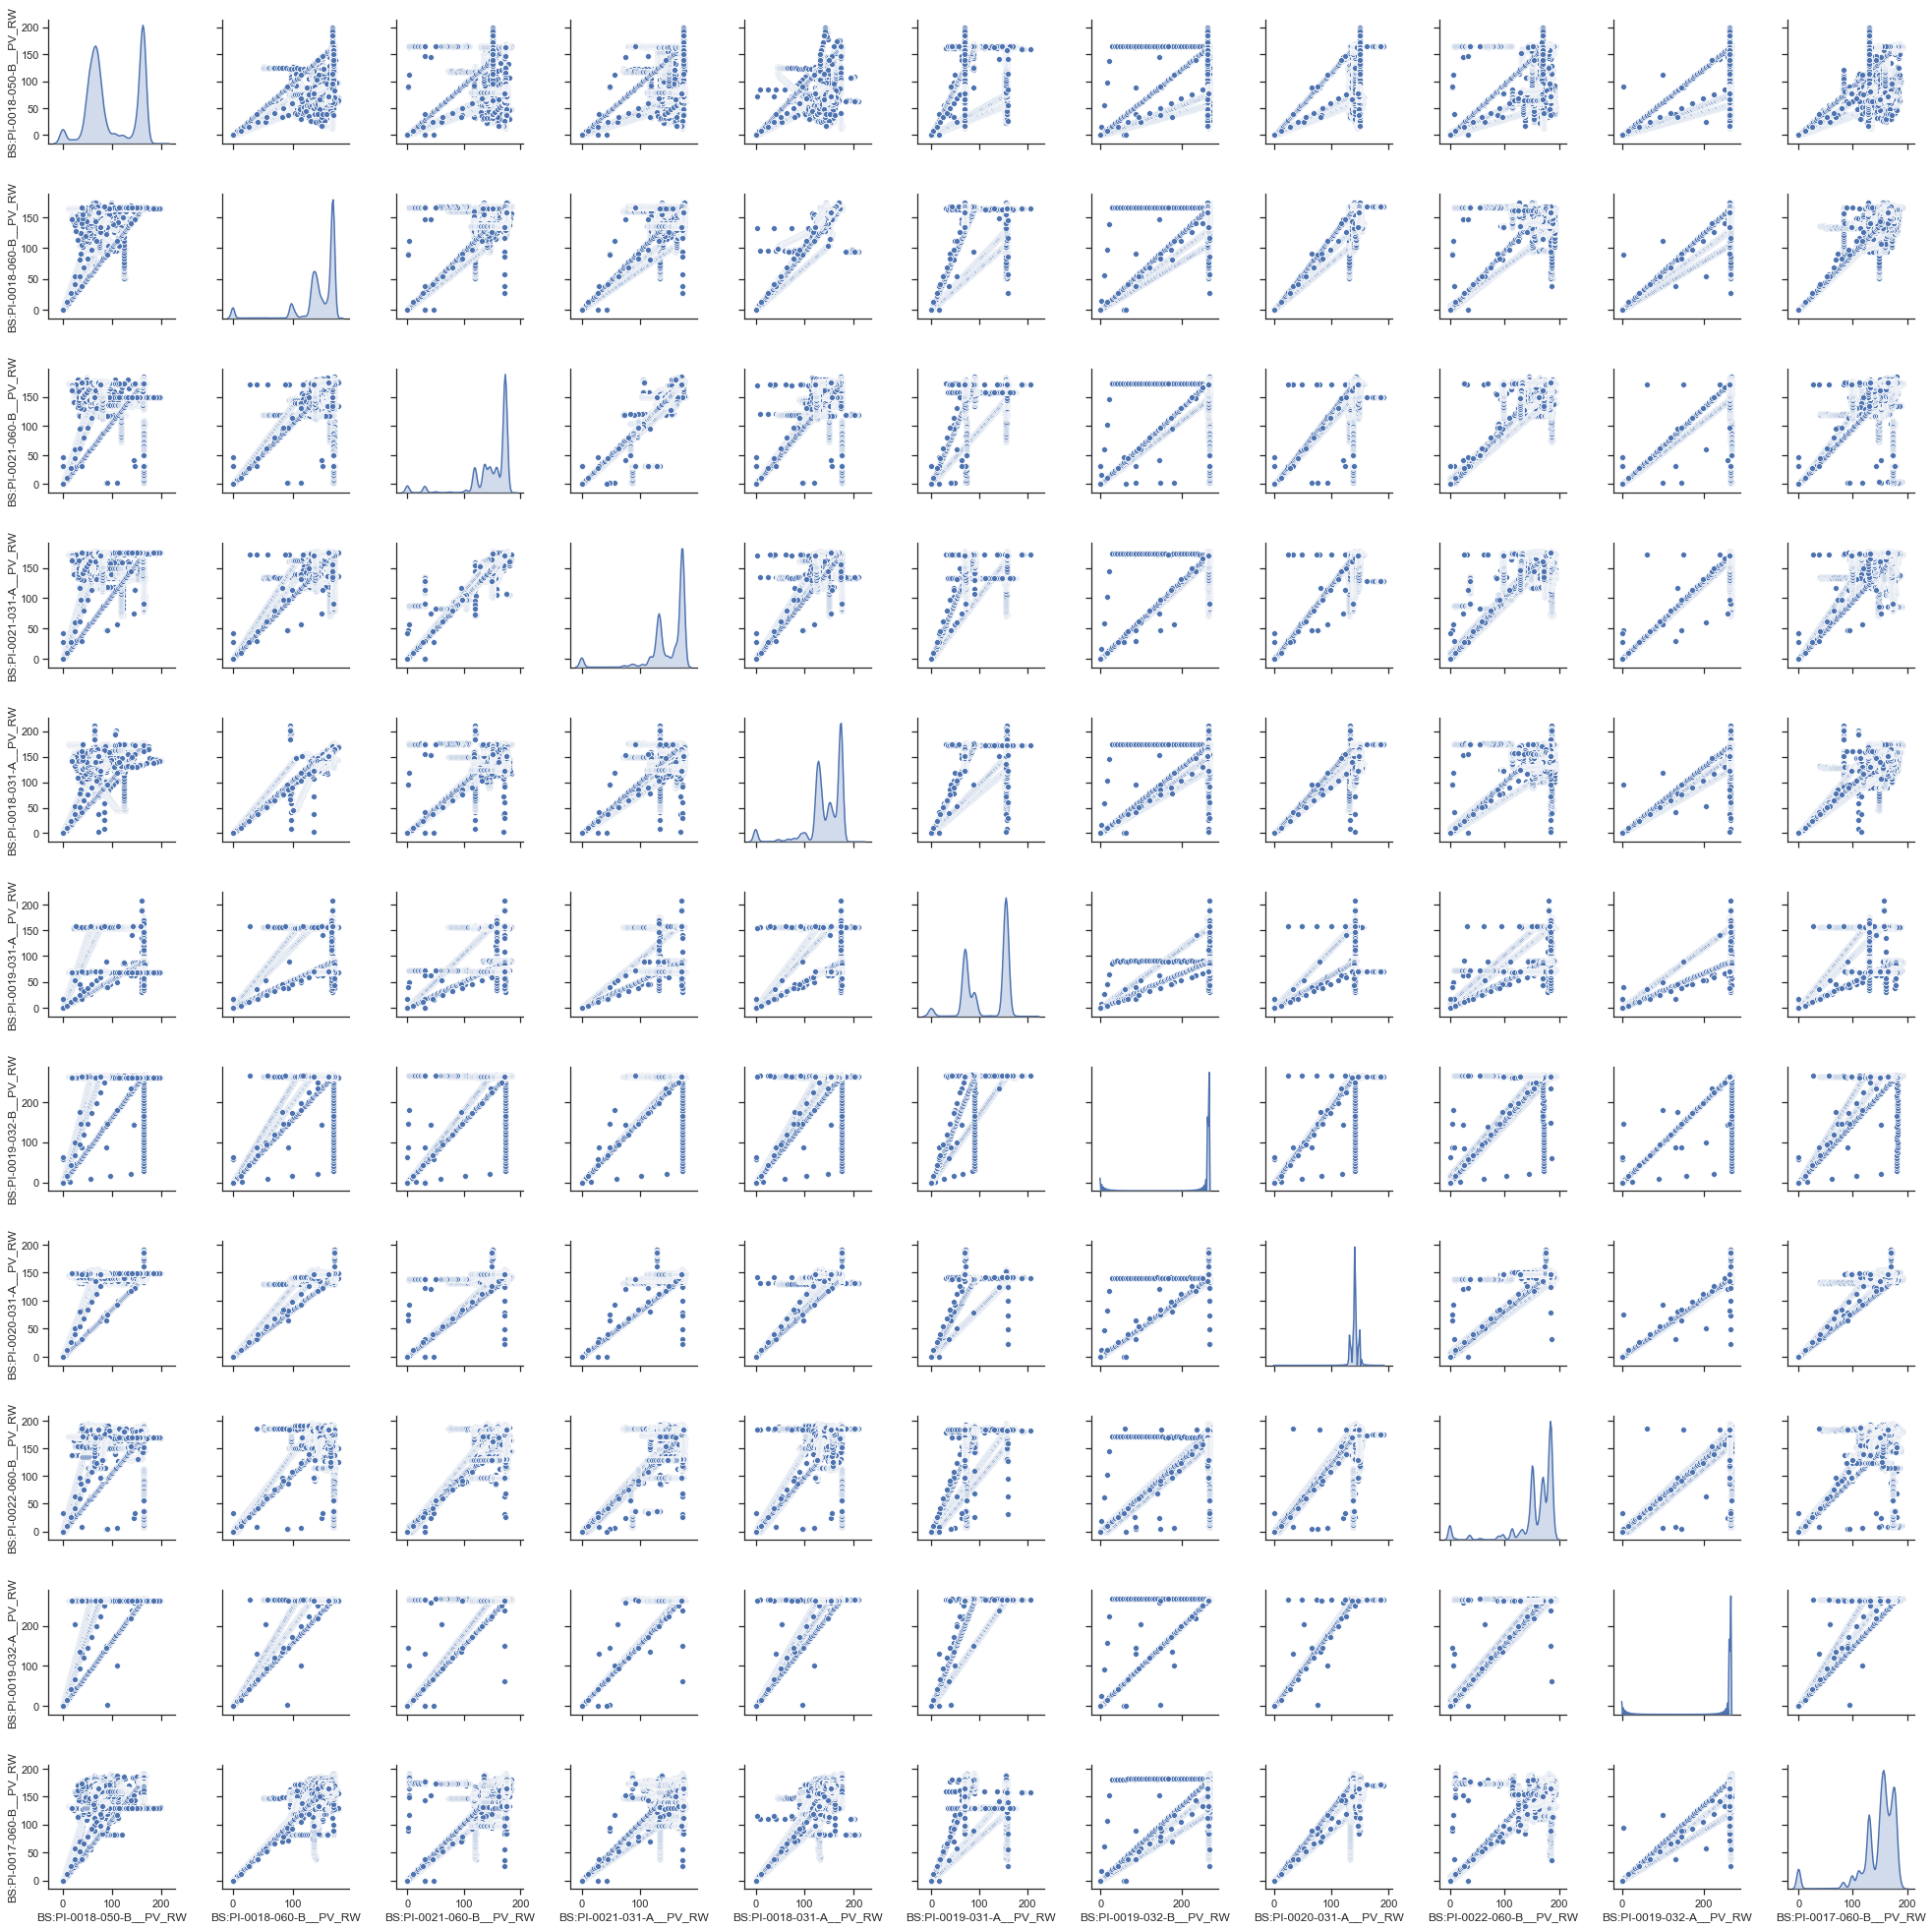

In [21]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(data, diag_kind = 'kde')

# Decomposition/Transformation

In [22]:
data = pd.read_csv("correlated_data.csv", low_memory = False)
to_drop = ['date']
data.drop(to_drop, axis = 1, inplace = True)

In [23]:
# Choice of cholesky or eigenvector method
method = 'cholesky'
#method = 'eigenvectors'

In [24]:
#cov = data.corr().abs()
cov = data.corr(method = 'spearman')

In [25]:
mu = []
for n in data.mean():
#    print(n)
    mu.append(n)

#desired mean values
m = np.array(mu)
print(m)

[ 99.04584452 142.32634543 148.50388522 148.20116823 141.72631104
 115.75335879 254.12215197 135.08618008 157.21439554 254.22555991
 147.25629711]


In [26]:
# Generate sample from 11 independent normally distributed random variables (with mean 0 and std. dev. 1) -> vectors

np.random.seed(1)
n = len(data.columns)

x = norm.rvs(size = (n, len(data)))

In [28]:
if method == 'cholesky':
    c = cholesky(cov, lower = True)
#else:
    # Compute the eigenvalues and eigenvectors

# Alternative

In [19]:
if method == "eigenvectors":
    evals, evecs = eigh(cov)
    #construct c, so c*c^T = r
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

In [22]:
y1 = np.dot(c, x)

df = pd.DataFrame(np.transpose(y1))


In [49]:
#L*L^T = cov
#L = np.linalg.cholesky(cov)

#uncorrelated = np.random.standard_normal((n, len(data)))
#correlated = np.dot(L, uncorrelated) + m.reshape(n, 1)
#correlated.shape

# Tansformed dataframe

In [29]:
# Convert the data to correlated random variables
y = np.dot(c, x)

In [30]:
y = np.transpose(y)
y.shape

(52490, 11)

In [31]:
df = pd.DataFrame(y)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.624345,1.251834,-0.704761,-0.876524,1.768828,-0.807126,0.086134,-1.051403,0.161109,0.126671,-0.443445
1,-0.611756,-1.139027,-0.607234,-0.523042,-0.556216,0.381003,-0.483522,-0.207979,0.427801,-0.340188,-1.245955
2,-0.528172,0.989402,1.685262,1.529415,1.156609,-2.057361,-1.116568,1.992949,0.553138,-1.199455,1.170698
3,-1.072969,-0.837816,1.008827,1.084713,-0.946132,-1.209977,-1.016639,0.345357,-0.690233,-1.052866,-0.381500
4,0.865408,-0.863483,-1.133056,-1.364510,-0.368081,0.555003,1.100493,-2.331169,0.904430,1.117384,-2.583341


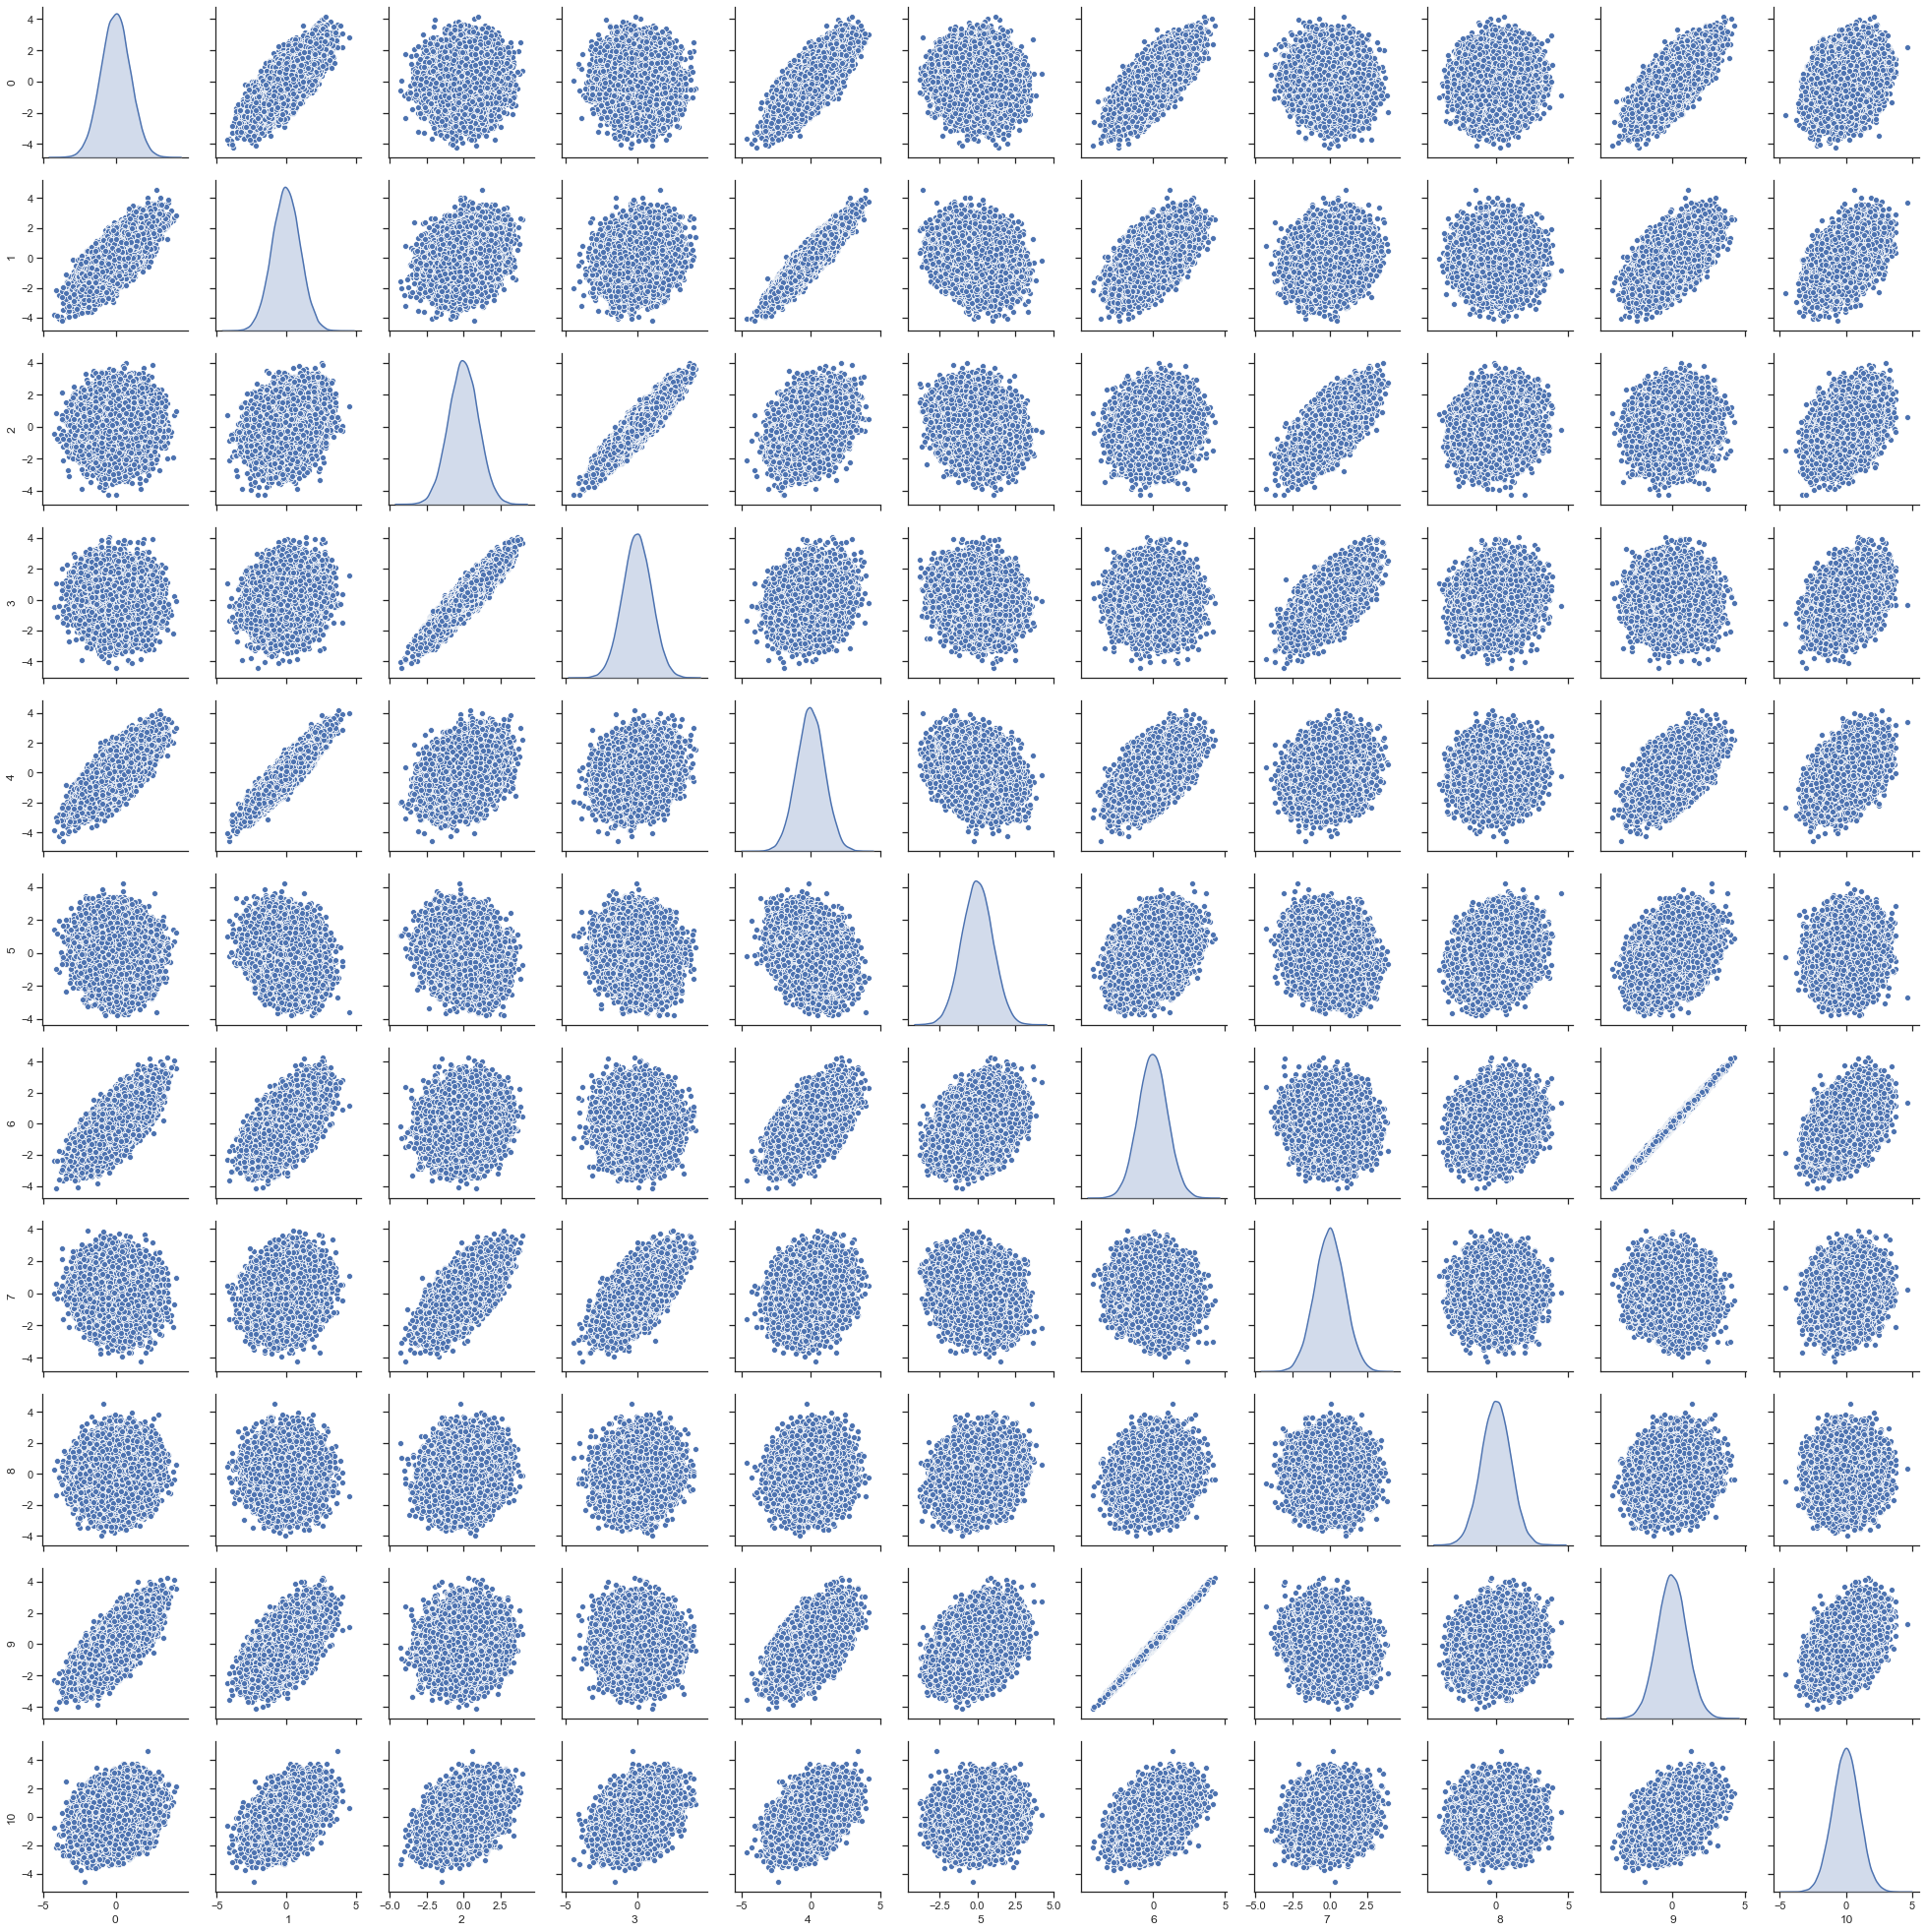

In [32]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(df, diag_kind = 'kde')

In [22]:
df.to_csv('NormalSample_correlated.csv')

# Transformed (new) variable mean, ranges

In [15]:
df = pd.read_csv('NormalSample_correlated.csv', low_memory = False)
df.mean()

0     0.004271
1     0.005839
2     0.005970
3     0.006776
4     0.004181
5     0.000234
6     0.001893
7     0.002373
8    -0.002370
9     0.002433
10    0.008892
dtype: float64

In [16]:
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df = df.drop('date', axis = 1)
df = df.sort_index()

In [17]:
col1 = df['0']
col1.min(), col1.max()

(-4.233164797, 4.168117678)

In [18]:
#df.add(value)
#df['col'].add(value)!!

df['0'] += 99.046

In [19]:
col2 = df['0']
col2.min(), col2.max()

(94.812835203, 103.21411767800001)

In [21]:
#y_mean = [np.mean(y)]*len(df)
col2.mean()

99.05027097200832

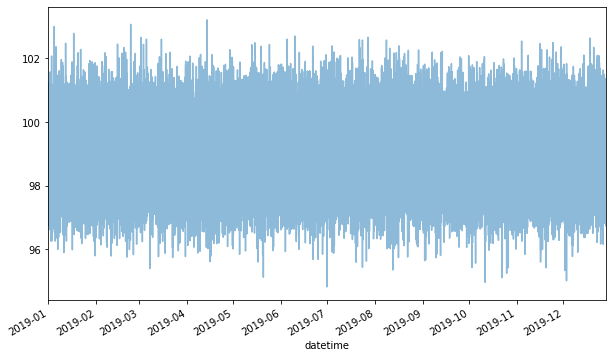

In [20]:
axes = col2.plot(alpha = 0.5, figsize = (10, 6))